# **Import Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data**

In [2]:

# Directory containing the CSV files
directory = '/kaggle/input/eeg-dataset-for-emotion-recognition/Data/'

# Initialize lists to store EEG channels and labels
all_eeg_channels = []
all_labels = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        print(file_path)
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Select the EEG channels columns
        eeg_channels = data[['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']][:-2]
        
        # Select the valence and arousal columns
        labels = data[['valence', 'arousal']].iloc[0]
        
        # Convert EEG channels and labels to arrays and store them
        all_eeg_channels.append(eeg_channels.values)
        all_labels.append(labels.values)

# Convert lists to arrays
all_eeg_channels_array = np.array(all_eeg_channels)
all_labels_array = np.array(all_labels)

# Print the shapes of the arrays
print("All EEG Channels Array Shape:", all_eeg_channels_array.shape)
print("All Labels Array Shape:", all_labels_array.shape)


/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S08G2AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S17G1AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S23G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S06G3AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S02G1AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S09G2AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S05G2AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S19G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S24G1AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S06G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S20G3AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S02G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S01G3AllChannels.csv
/kaggle/inpu

In [3]:
def map_labels(valence, arousal):
    if valence <= 2.5 and arousal <= 2.5:
        return 0  # Low valence, low arousal
    elif valence <= 2.5 and arousal > 2.5:
        return 1  # Low valence, high arousal
    elif valence > 2.5 and arousal <= 2.5:
        return 2  # High valence, low arousal
    else:
        return 3  # High valence, high arousal

# Example usage:
labels_mapped = np.array([map_labels(valence, arousal) for valence, arousal in all_labels_array])
labels_mapped

array([3, 0, 3, 1, 0, 2, 3, 2, 0, 3, 1, 3, 1, 0, 0, 0, 3, 0, 1, 3, 0, 2,
       1, 0, 2, 3, 3, 0, 0, 2, 2, 3, 0, 1, 0, 3, 2, 3, 0, 3, 1, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 3, 2, 3, 1, 3, 1, 0, 0, 1, 3, 3, 1, 3, 3, 0, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 1, 1, 3, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3,
       2, 3, 3, 2, 3, 0, 1, 0, 1, 0, 0, 3])

**Check Shape and Data Types:** Verify the shape and data types of the arrays.

**Summary Statistics:** Calculate basic summary statistics such as mean, median, minimum, maximum, and standard deviation for EEG channels.

**Visualization:** Plot histograms or boxplots for each EEG channel to understand their distributions.

**Correlation Analysis:** Compute correlation coefficients between EEG channels and visualize them using a heatmap.

**Label Analysis:** Plot histograms or boxplots for valence and arousal labels to understand their distributions.

**Label Correlation:** Compute correlation between valence and arousal labels.

**Feature Engineering:** Explore potential feature engineering techniques such as Fourier transforms, wavelet transforms, or other signal processing methods.

**Outlier Detection:** Detect and handle outliers if present in the data.

In [4]:
# 1. Check Shape and Data Types
print("All EEG Channels Array Shape:", all_eeg_channels_array.shape)
print("All Labels Array Shape:", all_labels_array.shape)
print("Data Type of EEG Channels Array:", all_eeg_channels_array.dtype)
print("Data Type of Labels Array:", all_labels_array.dtype)

# 2. Summary Statistics
eeg_summary = np.hstack((np.mean(all_eeg_channels_array, axis=1), np.median(all_eeg_channels_array, axis=1),
                         np.min(all_eeg_channels_array, axis=1), np.max(all_eeg_channels_array, axis=1),
                         np.std(all_eeg_channels_array, axis=1)))
print("Summary Statistics for EEG Channels:")
print("Mean, Median, Min, Max, Std Dev")
print(eeg_summary)

All EEG Channels Array Shape: (100, 38250, 14)
All Labels Array Shape: (100, 2)
Data Type of EEG Channels Array: float64
Data Type of Labels Array: float64
Summary Statistics for EEG Channels:
Mean, Median, Min, Max, Std Dev
[[ 1.84262773e-03 -3.11123141e-04 -1.84401708e-02 ...  1.35546284e+01
   1.14413433e+01  1.87494019e+01]
 [ 8.86378394e-02 -3.48195958e-02  3.91138417e-02 ...  2.63003718e+01
   1.95919308e+01  1.79759347e+01]
 [-3.10575813e-02  3.70766881e-04 -1.52140394e-03 ...  1.91945455e+01
   2.12990010e+01  1.30640194e+01]
 ...
 [ 4.70547857e-02 -1.74453476e-02  2.00154134e-02 ...  1.87731737e+01
   1.48591350e+01  1.35046303e+01]
 [-1.00953872e-04 -1.84742663e-03  1.17117986e-01 ...  1.34836988e+01
   7.85773974e+00  1.13683545e+01]
 [-4.07347053e-03 -1.77193717e-03  2.48088705e-03 ...  2.68276188e+01
   1.97865598e+01  2.76946865e+01]]


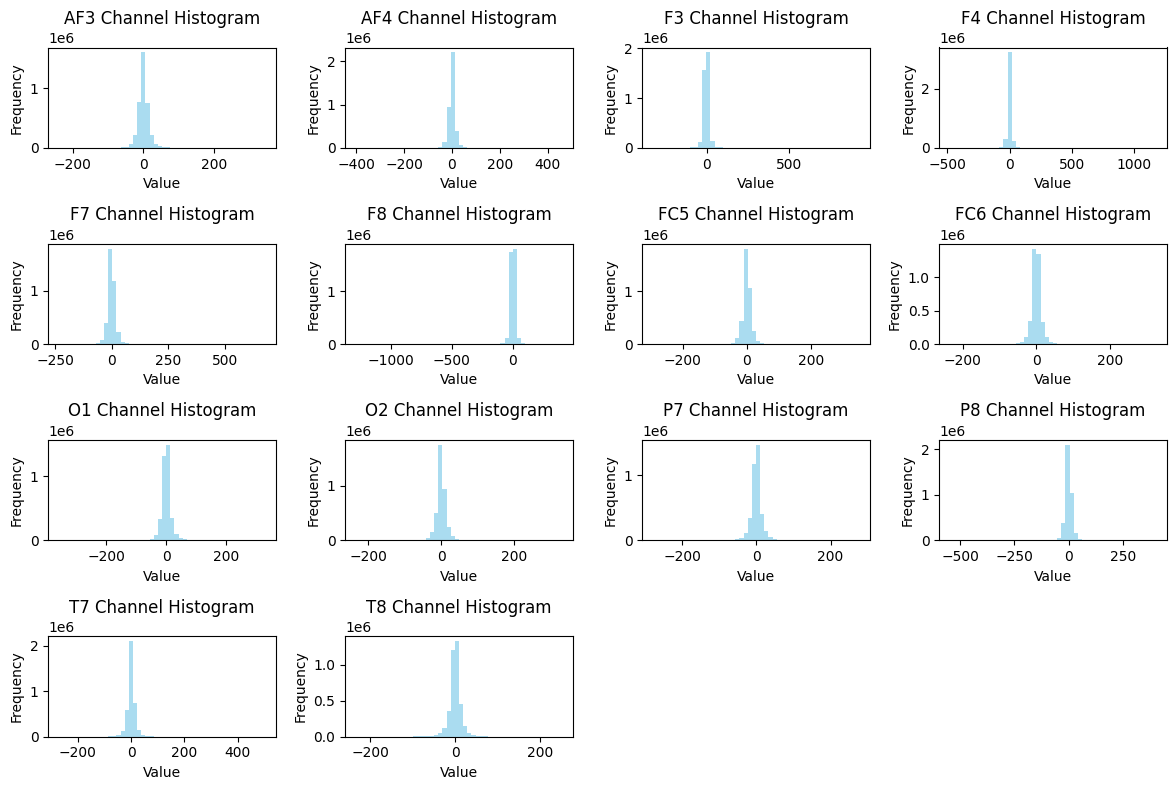

In [ ]:
channel_names = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']
# 3. Visualization
plt.figure(figsize=(12, 8))
for i in range(all_eeg_channels_array.shape[2]):
    plt.subplot(4, 4, i+1)
    plt.hist(all_eeg_channels_array[:,:,i].flatten(), bins=50, color='skyblue', alpha=0.7)
    plt.title(f"{channel_names[i]} Channel Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
'''
# 4. Visualization - Boxplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for i in range(all_eeg_channels_array.shape[2]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=all_eeg_channels_array[:, :, i], color='skyblue')
    plt.title(f"{channel_names[i]} Channel Boxplot")
    plt.xlabel("EEG Channels")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()
'''

'\n# 4. Visualization - Boxplot\nplt.figure(figsize=(12, 8))\nsns.set(style="whitegrid")\nfor i in range(all_eeg_channels_array.shape[2]):\n    plt.subplot(4, 4, i+1)\n    sns.boxplot(data=all_eeg_channels_array[:, :, i], color=\'skyblue\')\n    plt.title(f"{channel_names[i]} Channel Boxplot")\n    plt.xlabel("EEG Channels")\n    plt.ylabel("Value")\nplt.tight_layout()\nplt.show()\n'

In [ ]:
# Reduce the sample size for correlation analysis
sample_size = 1  # Sample size is now 1
sample_data = all_eeg_channels_array[0]  # Take the first sample

# Calculate correlation matrix for the sample data
corr_matrix = np.corrcoef(sample_data.T)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", 
            xticklabels=['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8'],
            yticklabels=['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8'])
plt.title("Correlation Matrix of EEG Channels (Single Sample)")
plt.xlabel("EEG Channels")
plt.ylabel("EEG Channels")
plt.show()


In [ ]:
# Calculate correlation matrices for all samples
cor_matrices = np.array([np.corrcoef(sample.T) for sample in all_eeg_channels_array])

# Stack correlation matrices along a new dimension
stacked_cor_matrices = np.stack(cor_matrices, axis=2)

# Take the mean along the new dimension to get the average correlation matrix
average_cor_matrix = np.mean(stacked_cor_matrices, axis=2)

# Plot the average correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(average_cor_matrix, cmap='coolwarm', annot=True, fmt=".2f", 
            xticklabels=['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8'],
            yticklabels=['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8'])
plt.title("Average Correlation Matrix of EEG Channels")
plt.xlabel("EEG Channels")
plt.ylabel("EEG Channels")
plt.show()


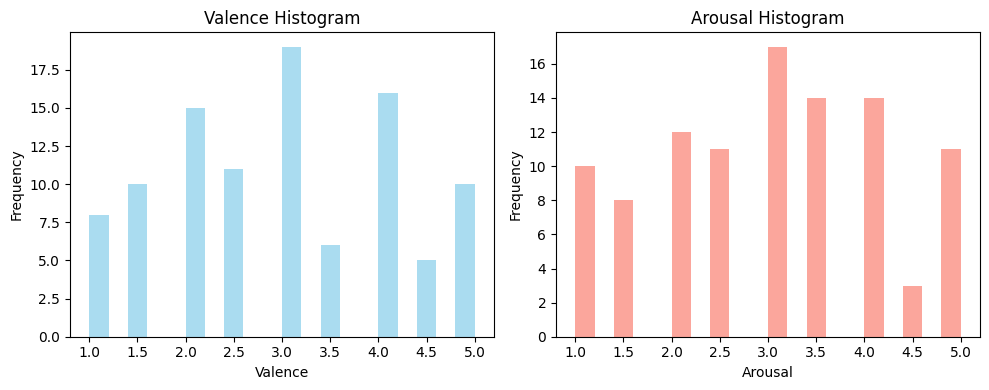

In [9]:
# 5. Label Analysis
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_labels_array[:,0], bins=20, color='skyblue', alpha=0.7)
plt.title("Valence Histogram")
plt.xlabel("Valence")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(all_labels_array[:,1], bins=20, color='salmon', alpha=0.7)
plt.title("Arousal Histogram")
plt.xlabel("Arousal")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


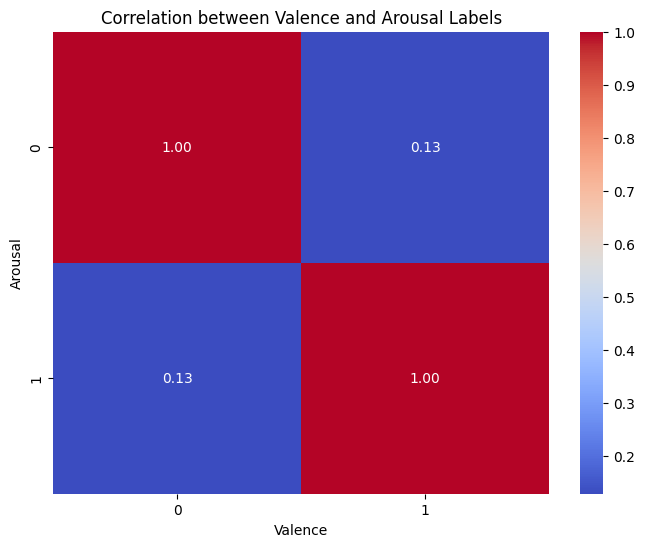

In [10]:

# 6. Label Correlation
#label_corr = np.corrcoef(all_labels_array[:,0], all_labels_array[:,1])
#print("Correlation between Valence and Arousal Labels:", label_corr)
import seaborn as sns

# Calculate the correlation matrix
label_corr_matrix = np.corrcoef(all_labels_array[:,0], all_labels_array[:,1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(label_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation between Valence and Arousal Labels")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.show()


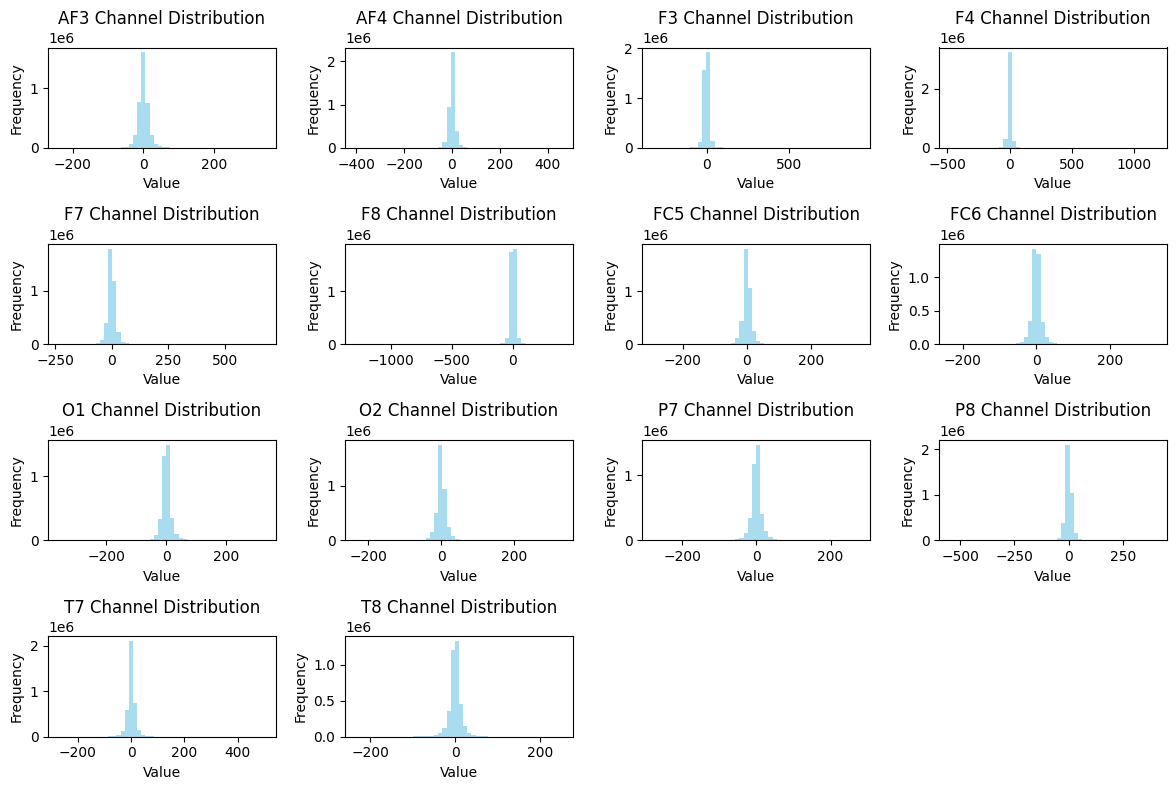

In [11]:
# 3. Visualization: Data Distribution
plt.figure(figsize=(12, 8))
for i in range(all_eeg_channels_array.shape[2]):
    plt.subplot(4, 4, i+1)
    plt.hist(all_eeg_channels_array[:, :, i].flatten(), bins=50, color='skyblue', alpha=0.7)
    plt.title(f"{channel_names[i]} Channel Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


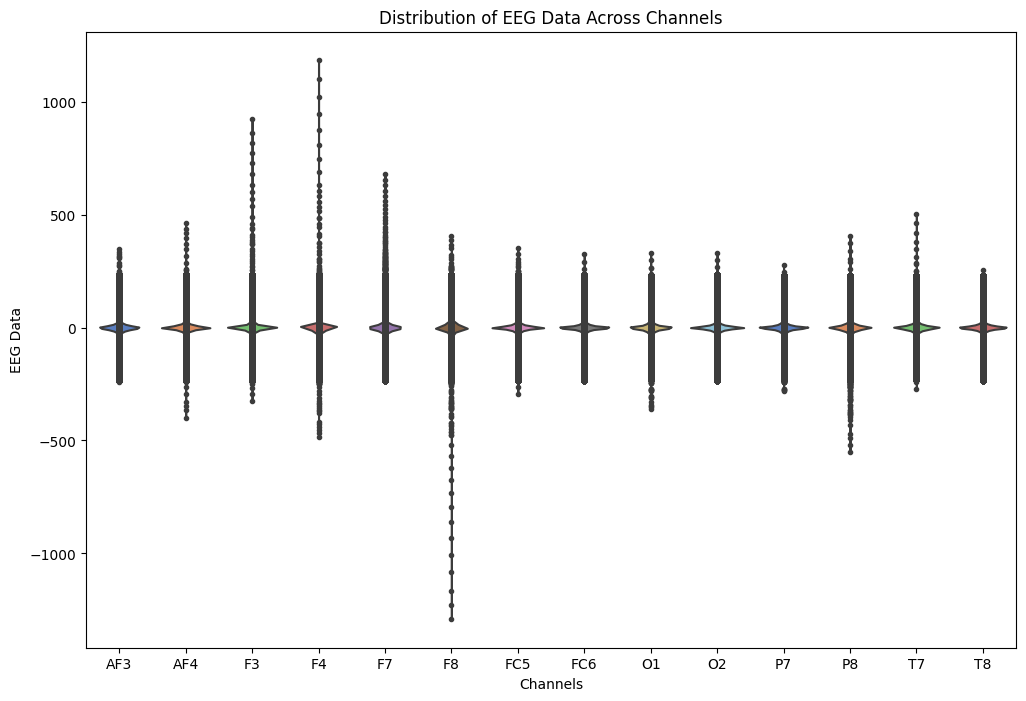

In [12]:
# Plot violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=all_eeg_channels_array.reshape(-1, all_eeg_channels_array.shape[-1]), 
               palette='muted', inner='point')
plt.title('Distribution of EEG Data Across Channels')
plt.xlabel('Channels')
plt.ylabel('EEG Data')
plt.xticks(ticks=np.arange(all_eeg_channels_array.shape[-1]), labels=channel_names)
plt.show()

In [13]:
import os

# Directory containing the CSV files
directory = '/kaggle/input/eeg-dataset-for-emotion-recognition/Data/'

# Initialize lists to store reshaped EEG channels and labels
all_reshaped_channels = []
all_labels = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        print(file_path)
        
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Select the EEG channels columns and the first 38250 samples
        eeg_channels = data[['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']][:38250]

        # Define the number of segments
        num_segments = 6
        
        # Calculate the segment size
        segment_size = eeg_channels.shape[0] // num_segments
        
        # Define the number of subsegments
        num_subsegments = 5
        
        # Calculate the subsegment size
        subsegment_size = segment_size // num_subsegments

        # Reshape the EEG channels data into segments and subsegments
        reshaped_channels = eeg_channels.values.reshape(1, num_segments, eeg_channels.shape[1], num_subsegments, subsegment_size)
        
        # Select the first 6 rows for labels
        labels = data[['valence', 'arousal']][:6].values.reshape(1, 6, -1)

        # Append the reshaped EEG channels and labels to the lists
        all_reshaped_channels.append(reshaped_channels)
        all_labels.append(labels)

# Convert lists to arrays
all_reshaped_channels_array = np.concatenate(all_reshaped_channels, axis=0)
all_labels_array = np.concatenate(all_labels, axis=0)

# Print the shapes of the arrays
print("All Reshaped EEG Channels Array Shape:", all_reshaped_channels_array.shape)
print("All Labels Array Shape:", all_labels_array.shape)


/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S08G2AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S17G1AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S23G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S06G3AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S02G1AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S09G2AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S05G2AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S19G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S24G1AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S06G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S20G3AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S02G4AllChannels.csv
/kaggle/input/eeg-dataset-for-emotion-recognition/Data/S01G3AllChannels.csv
/kaggle/inpu

In [14]:
#3d
# Reshape the EEG channels array
reshaped_channels_array = all_reshaped_channels_array.reshape(-1, all_reshaped_channels_array.shape[2], 
                                                            all_reshaped_channels_array.shape[3], 
                                                            all_reshaped_channels_array.shape[4])

# Reshape the labels array
reshaped_labels_array = all_labels_array.reshape(-1, all_labels_array.shape[2])

# Print the shapes of the reshaped arrays
print("Reshaped EEG Channels Array Shape:", reshaped_channels_array.shape)
print("Reshaped Labels Array Shape:", reshaped_labels_array.shape)


Reshaped EEG Channels Array Shape: (600, 14, 5, 1275)
Reshaped Labels Array Shape: (600, 2)


In [15]:
#3d
def map_labels(valence, arousal):
    if valence <= 2.5 and arousal <= 2.5:
        return 0  # Low valence, low arousal
    elif valence <= 2.5 and arousal > 2.5:
        return 1  # Low valence, high arousal
    elif valence > 2.5 and arousal <= 2.5:
        return 2  # High valence, low arousal
    else:
        return 3  # High valence, high arousal

# Example usage:
reshaped_labels_mapped = np.array([map_labels(valence, arousal) for valence, arousal in reshaped_labels_array])
reshaped_labels_mapped

array([3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

# Preprocessing 

**Filtering**

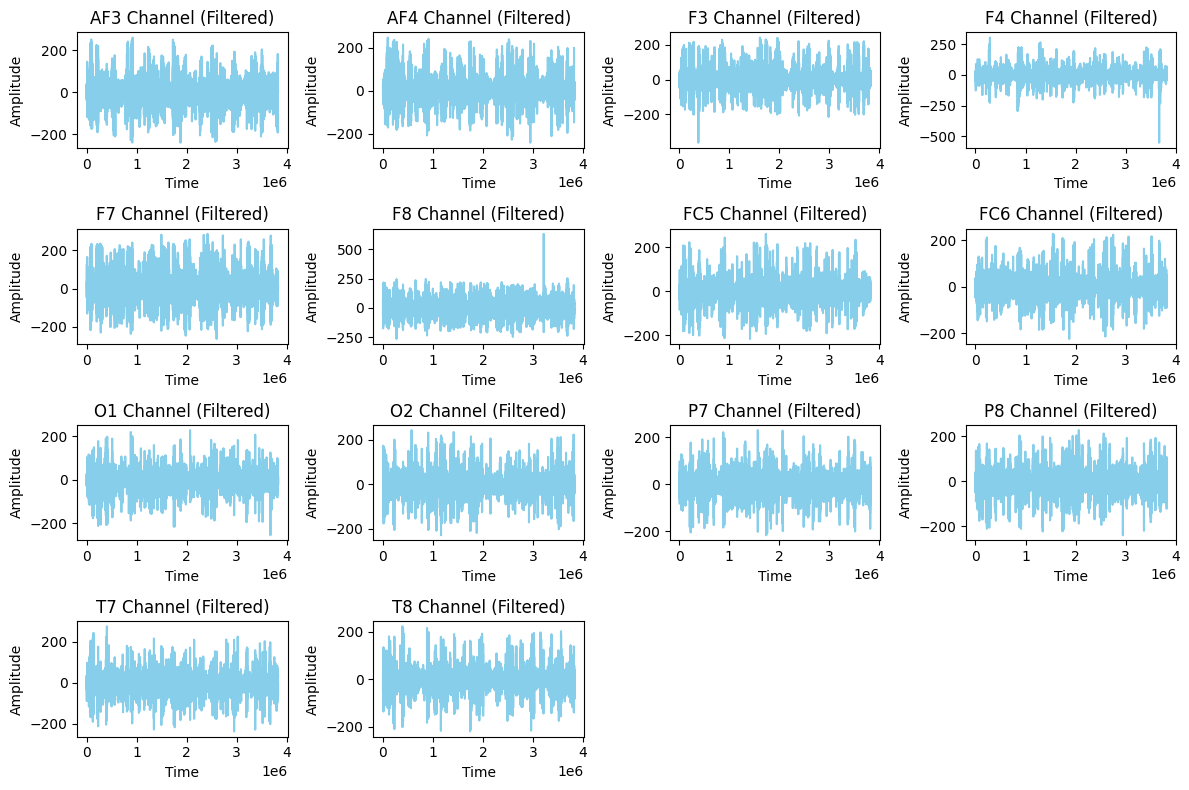

In [16]:
from scipy.signal import butter, filtfilt
channel_names = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']

# Define filter parameters
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 45  # Upper cutoff frequency in Hz
fs = 128      # Sampling frequency in Hz
order = 4     # Filter order

# Function to create Butterworth bandpass filter coefficients
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Apply the filter to each EEG channel
filtered_data = np.zeros_like(all_eeg_channels_array)
for i in range(all_eeg_channels_array.shape[2]):
    filtered_data[:,:,i] = butter_bandpass_filter(all_eeg_channels_array[:,:,i], lowcut, highcut, fs, order)

# Visualize the filtered data
plt.figure(figsize=(12, 8))
for i in range(filtered_data.shape[2]):
    plt.subplot(4, 4, i+1)
    plt.plot(filtered_data[:,:,i].flatten(), color='skyblue')
    plt.title(f"{channel_names[i]} Channel (Filtered)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


# 3d Filter 

In [ ]:
from scipy.signal import butter, filtfilt

# Define filter parameters
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 45  # Upper cutoff frequency in Hz
fs = 128      # Sampling frequency in Hz
order = 4     # Filter order

# Function to create Butterworth bandpass filter coefficients
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the Butterworth bandpass filter to a 3D array
def butter_bandpass_filter_3d(data, lowcut, highcut, fs, order=4):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            b, a = butter_bandpass(lowcut, highcut, fs, order=order)
            filtered_data[i, j, :, :] = filtfilt(b, a, data[i, j, :, :])
    return filtered_data

# Apply the filter to the EEG channels data
filtered_data = butter_bandpass_filter_3d(reshaped_channels_array, lowcut, highcut, fs, order)

# Visualize the filtered data for each channel
plt.figure(figsize=(12, 8))
for i in range(filtered_data.shape[1]):
    for j in range(filtered_data.shape[2]):
        plt.subplot(14, 5, i*5 + j + 1)
        plt.plot(filtered_data[0, i, j, :].flatten(), color='skyblue')
        plt.title(f"{channel_names[i]} Channel (Filtered)")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()



/tmp/ipykernel_33/4052731483.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


In [18]:
#no need after 3d reading
filtered_data_reshaped = filtered_data.transpose(0, 2, 1)
print("Reshaped Filtered Data Shape:", filtered_data_reshaped.shape)

filtered_data.shape

ValueError: axes don't match array

In [ ]:
#no need after 3d reading
import numpy as np

# Assuming filtered_data is your original data with shape (100, 14, 38252)
reshaped_filtered_data = filtered_data.reshape(100, 14, 6, 6375)
reshaped_filtered_data = reshaped_filtered_data.transpose(0, 2, 1, 3)
# Check the shape of the reshaped data
print("Reshaped Filtered Data Shape:", reshaped_filtered_data.shape)



# Feature Extraction

In [ ]:
'''import numpy as np
from scipy.stats import entropy

# Define the number of segments
num_segments = 6

# Define a function to compute differential entropy for a given EEG channel
def compute_differential_entropy(channel_data):
    # Estimate probability density function using histogram-based method
    hist, bin_edges = np.histogram(channel_data, bins='auto', density=True)
    
    # Compute entropy
    entropy_value = entropy(hist, base=2)  # Use base 2 for entropy calculation
    
    return entropy_value

# Compute differential entropy for each segment in the dataset
num_samples = filtered_data.shape[0]
num_channels = filtered_data.shape[2]
segment_size = filtered_data.shape[1] // num_segments

differential_entropy_features = []

for sample_idx in range(num_samples):
    sample_segment_entropy = []
    
    for segment_idx in range(num_segments):
        segment_entropy = []
        
        # Calculate start and end indices for the segment
        start_idx = segment_idx * segment_size
        end_idx = start_idx + segment_size
        
        for i in range(num_channels):
            channel_data = filtered_data[sample_idx, start_idx:end_idx, i]
            channel_segment_entropy = []
            for point_idx in range(len(channel_data)):
                point_data = channel_data[point_idx]
                entropy_value = compute_differential_entropy(point_data)
                channel_segment_entropy.append(entropy_value)
                
            segment_entropy.append(channel_segment_entropy)
        
        sample_segment_entropy.append(segment_entropy)
    
    differential_entropy_features.append(sample_segment_entropy)

# Convert the list to a numpy array
differential_entropy_features = np.array(differential_entropy_features)

# Print the shapes of the features and labels
print("Differential Entropy Features Shape:", differential_entropy_features.shape)
print("Labels Shape:", all_labels_array.shape)
'''


In [ ]:
import numpy as np
from scipy.stats import entropy

# Assuming you have filtered EEG data stored in filtered_data variable
# Assuming labels are stored in all_labels_array variable

# Define a function to compute differential entropy for a given EEG channel
def compute_differential_entropy(channel_data):
    # Estimate probability density function using histogram-based method
    hist, bin_edges = np.histogram(channel_data, bins='auto', density=True)
    
    # Compute entropy
    entropy_value = entropy(hist, base=2)  # Use base 2 for entropy calculation
    
    return entropy_value

# Compute differential entropy for each sample in the dataset
num_samples = filtered_data.shape[0]
num_channels = filtered_data.shape[2]
differential_entropy_features = []
for sample_idx in range(num_samples):
    sample_entropy = []
    for i in range(num_channels):
        channel_data = filtered_data[sample_idx, :, i]
        entropy_value = compute_differential_entropy(channel_data)
        sample_entropy.append(entropy_value)
    differential_entropy_features.append(sample_entropy)

# Convert the list to a numpy array
differential_entropy_features = np.array(differential_entropy_features)

# Print the shapes of the features and labels
print("Differential Entropy Features Shape:", differential_entropy_features.shape)
print("Labels Shape:", all_labels_array.shape)


In [19]:
import numpy as np
from scipy.stats import entropy

# Reshape the reshaped_channels_array to (600, 14, 5, 1275)
reshaped_channels_array = reshaped_channels_array.reshape(600, 14, 5, 1275)

# Function to compute differential entropy for a given EEG segment
def compute_differential_entropy(segment):
    # Estimate probability density function using histogram-based method
    hist, bin_edges = np.histogram(segment, bins='auto', density=True)
    # Compute entropy
    entropy_values = entropy(hist, base=2)  # Use base 2 for entropy calculation
    return entropy_values

# Compute differential entropy for each segment
differential_entropy_features = np.zeros((600, 14, 5, 1275))
for i in range(600):
    for j in range(14):
        for k in range(5):
            segment = reshaped_channels_array[i, j, k, :]
            differential_entropy_features[i, j, :, k] = compute_differential_entropy(segment)

# Swap the last two dimensions
differential_entropy_features = np.swapaxes(differential_entropy_features, -1, -2)

# Check the shape of the computed features
print("Differential Entropy Features Shape:", differential_entropy_features.shape)


Differential Entropy Features Shape: (600, 14, 1275, 5)


In [20]:
data = differential_entropy_features
labels_edited = reshaped_labels_mapped
data.shape

(600, 14, 1275, 5)

In [22]:
from sklearn.utils import shuffle
#(675, 62, 265, 5)(675,)
#(600, 14, 5, 1275) (600,)
differential_entropy_features, reshaped_labels_mapped = shuffle(differential_entropy_features, reshaped_labels_mapped)

# Traing

In [ ]:
!pip install keras-tuner
!pip install mat73
!pip install -U tensorflow-addons

#from google.colab import drive
#drive.mount('/content/drive')
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
import mat73
from keras.callbacks import ReduceLROnPlateau
import sklearn.metrics
from sklearn.utils import shuffle
from tensorflow.keras import layers
#import tensorflow_addons as tfa
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv3D, MaxPooling3D, BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


In [ ]:
import tensorflow.keras as keras
#import tensorflow_addons as tfa

In [ ]:
#**OLD trainging **

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you have the following shapes for features and labels
# differential_entropy_features.shape: (100, 14)
# all_labels_array.shape: (100, 2)

# Selecting only arousal labels
arousal_labels = all_labels_array[:, 1]  # Assuming arousal is the second column

# Reshaping features to add channel dimension (required for CNN)
differential_entropy_features = differential_entropy_features.reshape(-1, 14, 1)

# Splitting data into training and validation sets
train_ratio = 0.8
train_size = int(train_ratio * len(differential_entropy_features))

train_features = differential_entropy_features[:train_size]
train_labels = arousal_labels[:train_size]
val_features = differential_entropy_features[train_size:]
val_labels = arousal_labels[train_size:]

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(14, 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


In [ ]:
# Train the model
history = model.fit(train_features, train_labels, epochs=10, batch_size=16, validation_data=(val_features, val_labels))

# Evaluate the model on the validation set
val_loss, val_mae = model.evaluate(val_features, val_labels)

print("Validation Loss:", val_loss)
print("Validation MAE:", val_mae)


**Colab traing**

In [ ]:
cumul = []
for i in range(4): cumul.append([])

In [ ]:
max_val = np.max(data)
min_val = np.min(data)

# Normalizing data
data = data / max_val
data = (data - np.mean(data)) / np.std(data)

# Cropping end time segments
data = data[:, :, 0:1250, :]

# Splitting Dataset into train, validation, test
train_labels = labels_edited[0:520]
test_labels = labels_edited[520:560]
final_labels = labels_edited[560:600]

train_data = data[0:520]
test_data = data[520:560]
final_test = data[560:600]

cf_labels = np.where(final_labels == -1, 3, final_labels)  # Label in the form for confusion matrix
un, co = np.unique(cf_labels, return_counts=True)
print(f'Unique: {un}, Counts: {co}')

train_labels_reshaped = train_labels.reshape(-1, 1)  # Formatting for input to the CNN model
test_labels_reshaped = test_labels.reshape(-1, 1)
final_labels_reshaped = final_labels.reshape(-1, 1)

train_labels_reshaped = to_categorical(train_labels_reshaped, 4)  # One Hot Encoding
test_labels_reshaped = to_categorical(test_labels_reshaped, 4)
final_labels_reshaped = to_categorical(final_labels_reshaped, 4)

rnn_train = train_data.reshape(520, 14, -1)  # Formatting for RNN input
rnn_test = test_data.reshape(40, 14, -1)
rnn_train = np.transpose(rnn_train, (0, 2, 1))
rnn_test = np.transpose(rnn_test, (0, 2, 1))

print(train_data.shape, rnn_train.shape)


In [ ]:
fig, a = plt.subplots(5, 1, squeeze= False, figsize= (15, 10))
titles = ['Alpha', 'Beta', 'Delta', 'Gamma', 'Theta']
for cnt in range(5):
  for i in range(len(test_data[5])):
    a[cnt][0].plot(range(len(test_data[5][i,:,cnt])), test_data[5][i,:,cnt])
  a[cnt][0].set_title(titles[cnt])
  a[cnt][0].set_xlabel('Samples')
  a[cnt][0].set_ylabel('Amplitude')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(filters=64, kernel_size=5, input_shape=(14, 1250, 5), padding='same'), 
    Conv2D(filters=64, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),  # Adjusted max-pooling layer
    Dropout(rate=0.3),
    Conv2D(filters=128, kernel_size=3, padding='same'), 
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),  # Adjusted max-pooling layer
    Dropout(rate=0.2),
    Conv2D(filters=256, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),  # Adjusted max-pooling layer
    Dropout(rate=0.25),
    Conv2D(filters=512, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),  # Adjusted max-pooling layer
    Dropout(rate=0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.4),
    Dense(256, activation='relu'),
    Dropout(rate=0.2),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=9e-5), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy', tf.keras.metrics.RootMeanSquaredError()])

model.summary()


In [ ]:
dot_img_file = 'model CNN .png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
#Training our CNN model using a learning rate annealer (Reduces LR on Plateaus)
reduce_lr_cnn = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-7) #patience = 5 and factor = 0.9

history = model.fit(
  train_data,
  train_labels_reshaped,
  batch_size = 128,
  epochs=100,
  validation_data=(test_data, test_labels_reshaped),
  callbacks = [reduce_lr_cnn]
)